In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

C:\Users\Ernie\AppData\Local\Temp\ipykernel_28108\2835508603.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [10]:
# Save references to each table
Station = Base.classes.station
Measurement= Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
print(Station)
print(Measurement)

<class 'sqlalchemy.ext.automap.station'>
<class 'sqlalchemy.ext.automap.measurement'>


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = '2017-08-23'

most_recent_date=datetime.strptime(most_recent_date, "%Y-%m-%d")
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [15]:
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - timedelta(days = 365)
one_year_ago_formatted = one_year_ago.strftime("%Y-%m-%d")
one_year_ago_formatted

'2016-08-23'

In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_ago_formatted).all()
for row in results[:5]:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)


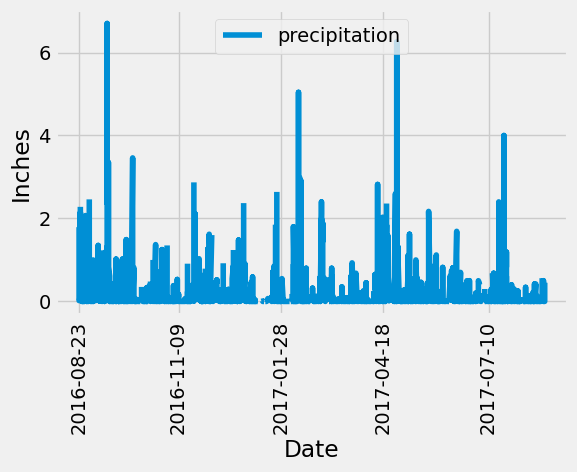

In [21]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results,columns=['date','precipitation'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(6,5))
plt.plot(df['date'],df['precipitation'], linestyle = '-', label= 'precipitation')

# Format x-axis ticks to show full date
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.grid(True)

specific_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(pd.to_datetime(specific_dates), rotation=90)

plt.tight_layout()
plt.show()


In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats= df['precipitation'].describe()

summary_df = pd.DataFrame(summary_stats)
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [20]:
# Close Session
session.close()